In [1]:
import pandas as pd
import numpy as np

train = pd.read_csv('adult.data', names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary'])
test = pd.read_csv('adult.test', skiprows=1, names=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary'])

ssTe = dict(zip([' <=50K.', ' >50K.'],[0, 1]))
ssTr = dict(zip([' <=50K', ' >50K'],[0, 1]))
test['salary'] = test['salary'].apply(lambda x: ssTe[x])
train['salary'] = train['salary'].apply(lambda x: ssTr[x])

columns_cat = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'salary']
#train[columns_cat] = train[columns_cat].astype('category')
#test[columns_cat] = test[columns_cat].astype('category')

train.drop(train.loc[train['native-country']==' Holand-Netherlands'].index, axis=0, inplace=True)
train = train.drop_duplicates()
test = test.drop_duplicates()

print(train['salary'].value_counts())
print(test['salary'].value_counts())
train

0    24697
1     7839
Name: salary, dtype: int64
0    12430
1     3846
Name: salary, dtype: int64


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [2]:
for i in train.columns:
    print('Column: ',i)
    print(train[i].value_counts(),'\n\n')

Column:  age
36    898
31    888
34    886
23    876
33    875
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64 


Column:  workclass
 Private             22672
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 


Column:  fnlwgt
164190    13
203488    13
123011    13
148995    12
121124    12
          ..
65078      1
68318      1
284211     1
312881     1
229376     1
Name: fnlwgt, Length: 21647, dtype: int64 


Column:  education
 HS-grad         10494
 Some-college     7281
 Bachelors        5353
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           33

In [3]:
#data.replace(' ?',np.nan, inplace=True)
gni = {' Trinadad&Tobago': 4230,
 ' Guatemala': 1440,
 ' Laos': 380,
 ' Peru': 2150,
 ' Thailand': 2950,
 ' Holand-Netherlands': 29750,
 ' Outlying-US(Guam-USVI-etc)': 0,
 ' Vietnam': 300,
 ' Ireland': 18880,
 ' Ecuador': 2080,
 ' Columbia': 2540,
 ' Japan': 43150,
 ' France': 27110,
 ' Cuba': 2710,
 ' Yugoslavia': 5464,
 ' Dominican-Republic': 2170,
 ' Nicaragua': 880,
 ' Hungary': 4370,
 ' Puerto-Rico': 8130,
 ' Cambodia': 320,
 ' Jamaica': 2510,
 ' Germany': 30860,
 ' Honduras': 870,
 ' Mexico': 4620,
 ' Haiti': 360,
 ' Greece': 20794,
 ' South': 3660,
 ' India': 400,
 ' Philippines': 1160,
 ' El-Salvador': 1590,
 ' England': 22790,
 ' Poland': 11089,
 ' Canada': 20810,
 ' Taiwan': 13588,
 ' Iran': 1580,
 ' United-States': 30270,
 ' Scotland': 16324,
 ' Portugal': 14970,
 ' China': 650,
 ' Italy': 21830,
 ' ?' : np.nan,
 ' Hong': 24140}

train['GNI'] = train['native-country'].apply(lambda x: gni[x])
test['GNI'] = test['native-country'].apply(lambda x: gni[x])

train.replace(' ?',np.nan, inplace=True)
test.replace(' ?',np.nan, inplace=True)

#data['native-country'].value_counts()
#data.loc[data['native-country'].isnull()]
#print(data.loc[data['workclass'].isnull()])
print(train['native-country'].value_counts().index)
print(test['native-country'].value_counts().index)

Index([' United-States', ' Mexico', ' Philippines', ' Germany', ' Canada',
       ' Puerto-Rico', ' El-Salvador', ' India', ' Cuba', ' England',
       ' Jamaica', ' South', ' China', ' Italy', ' Dominican-Republic',
       ' Vietnam', ' Guatemala', ' Japan', ' Poland', ' Columbia', ' Taiwan',
       ' Haiti', ' Iran', ' Portugal', ' Nicaragua', ' Peru', ' France',
       ' Greece', ' Ecuador', ' Ireland', ' Hong', ' Trinadad&Tobago',
       ' Cambodia', ' Thailand', ' Laos', ' Yugoslavia',
       ' Outlying-US(Guam-USVI-etc)', ' Hungary', ' Honduras', ' Scotland'],
      dtype='object')
Index([' United-States', ' Mexico', ' Philippines', ' Puerto-Rico', ' Germany',
       ' Canada', ' India', ' El-Salvador', ' China', ' Cuba', ' England',
       ' South', ' Dominican-Republic', ' Italy', ' Haiti', ' Portugal',
       ' Japan', ' Poland', ' Columbia', ' Jamaica', ' Guatemala', ' Greece',
       ' Vietnam', ' Ecuador', ' Iran', ' Nicaragua', ' Peru', ' Taiwan',
       ' Ireland', ' Thai

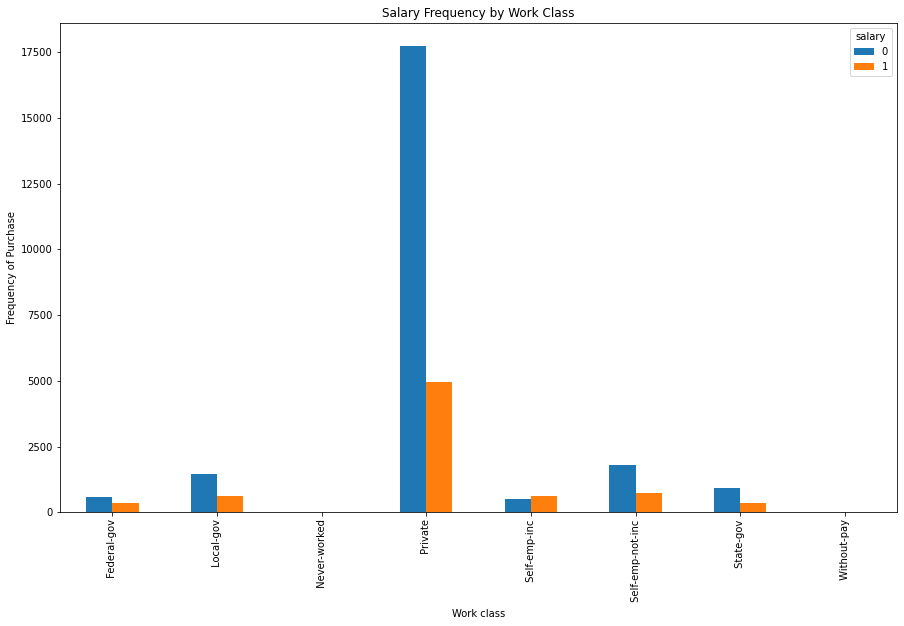

In [4]:
from matplotlib import pyplot as plt

#dum = pd.get_dummies(train['workclass'])
tr_wc = train[['workclass','salary']]
#tr_wc = pd.concat([tr_wc,dum],axis=1).dropna()

Ytr_wc = tr_wc['salary']
#Xtr_wc = tr_wc.drop(['workclass', 'salary'], axis=1)


#dum = pd.get_dummies(test['workclass'])
te_wc = test[['workclass','salary']]
#te_wc = pd.concat([te_wc,dum],axis=1).dropna()

Yte_wc = te_wc['salary']
#Xte_wc = te_wc.drop(['workclass', 'salary'], axis=1)

#print(pd.concat([tr_wc.groupby('workclass').mean(), tr_wc.groupby('workclass').count()], axis=1))

pd.crosstab(train['workclass'],train['salary']).plot(kind='bar', figsize=(15, 9))
plt.title('Salary Frequency by Work Class')
plt.xlabel('Work class')
plt.ylabel('Frequency of Purchase')
plt.show()

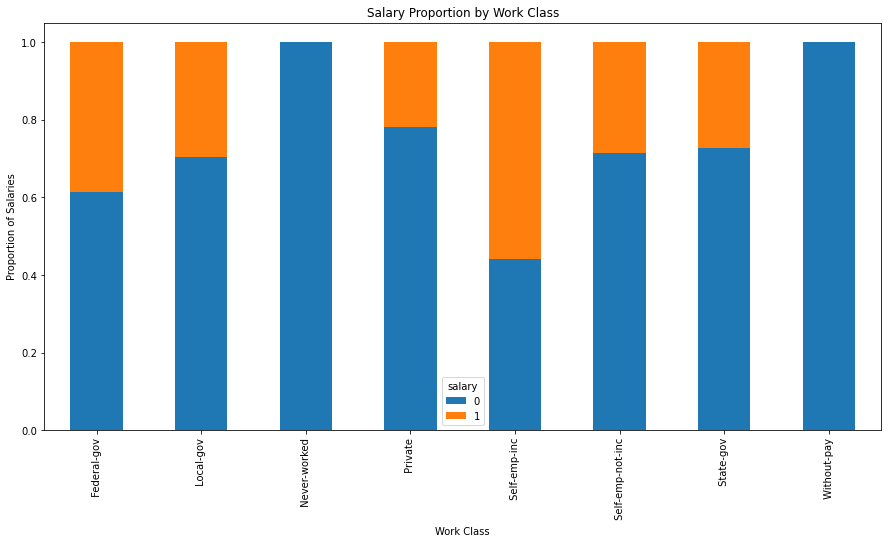

,mean,count
workclass,,
Federal-gov,0.386458,960
Local-gov,0.294792,2093
Never-worked,0.000000,7
Private,0.218816,22672
Self-emp-inc,0.557348,1116
Self-emp-not-inc,0.285039,2540
State-gov,0.271957,1298
Without-pay,0.000000,14


In [5]:
table=pd.crosstab(train['workclass'],train['salary'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(15, 7.5))
plt.title('Salary Proportion by Work Class')
plt.xlabel('Work Class')
plt.ylabel('Proportion of Salaries')
plt.show()

x = pd.concat([tr_wc.groupby('workclass').mean(),tr_wc.groupby('workclass').count()],axis=1)
x.columns = ['mean', 'count']
x

In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix

LR = LogisticRegression().fit(Xtr_wc, Ytr_wc)
y_pred = LR.predict(Xte_wc)

#from sklearn.ensemble import GradientBoostingClassifier
#GBC = GradientBoostingClassifier(random_state=0)
#GBC.fit(Xtr_wc, Ytr_wc)
#y_pred1 = GBC.predict(Xte_wc)

#y_pred
print(confusion_matrix(Yte_wc, y_pred))
#print(classification_report(Yte_wc, y_pred))

print(Yte_wc.value_counts())
print(pd.Series(y_pred).value_counts())

#print('\n\n',confusion_matrix(Yte_wc, y_pred1))
#print(classification_report(Yte_wc, y_pred1))

[[11279   262]
 [ 3456   316]]
0    11541
1     3772
Name: salary, dtype: int64
0    14735
1      578
dtype: int64


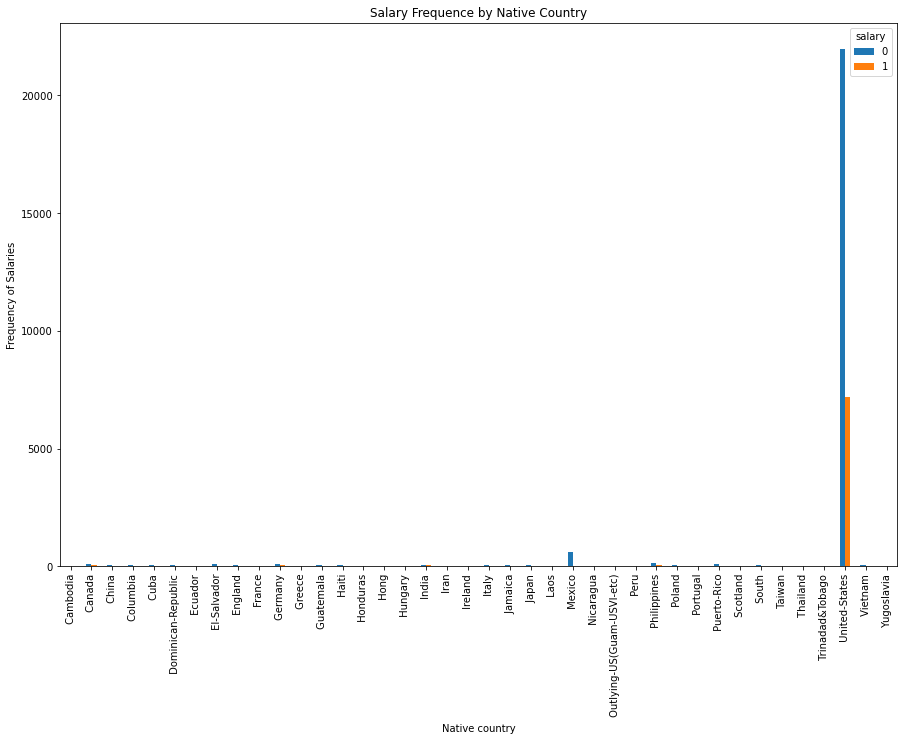

In [19]:
#dum = pd.get_dummies(train['native-country'])
tr_co = train[['native-country','salary']]
#tr_co = pd.concat([tr_co,dum],axis=1).dropna()

Ytr_co = tr_co['salary']
#Xtr_co = tr_co.drop(['native-country', 'salary'], axis=1)


#dum = pd.get_dummies(test['native-country'])
te_co = test[['native-country','salary']]
#te_co = pd.concat([te_co,dum],axis=1).dropna()

Yte_co = te_co['salary']
#Xte_co = te_co.drop(['native-country', 'salary'], axis=1)


#print(pd.concat([tr_co.groupby('native-country').mean(),tr_co.groupby('native-country').count()],axis=1))

pd.crosstab(train['native-country'],train['salary']).plot(kind='bar', figsize=(15, 10))
plt.title('Salary Frequence by Native Country')
plt.xlabel('Native country')
plt.ylabel('Frequency of Salaries')
plt.show()

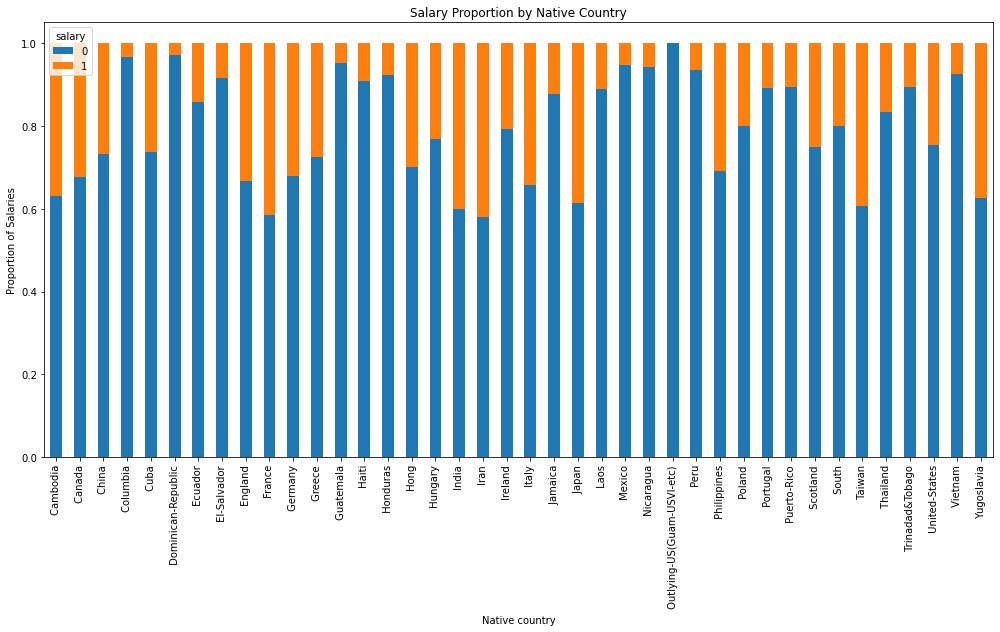

,mean,count
native-country,,
Cambodia,0.368421,19
Canada,0.322314,121
China,0.266667,75
Columbia,0.033898,59
Cuba,0.263158,95
Dominican-Republic,0.028571,70
Ecuador,0.142857,28
El-Salvador,0.084906,106
England,0.333333,90


In [7]:
table=pd.crosstab(train['native-country'],train['salary'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(17, 8))
plt.title('Salary Proportion by Native Country')
plt.xlabel('Native country')
plt.ylabel('Proportion of Salaries')
plt.show()


x = pd.concat([tr_co.groupby('native-country').mean(),tr_co.groupby('native-country').count()],axis=1)
x.columns = ['mean', 'count']
x

In [77]:
LR = LogisticRegression().fit(Xtr_co, Ytr_co)
y_pred = LR.predict(Xte_co)

GBC = GradientBoostingClassifier(random_state=0)
GBC.fit(Xtr_co, Ytr_co)
y_pred1 = GBC.predict(Xte_co)


print(confusion_matrix(Yte_co, y_pred))
#print(classification_report(Yte_co, y_pred))

#print('\n\n',confusion_matrix(Yte_co, y_pred1))
#print(classification_report(Yte_co, y_pred1))

print('\n\n',Ytr_co.value_counts())
print(pd.Series(y_pred).value_counts())
print(pd.Series(y_pred))

[[12230     0]
 [ 3772     0]]


  <=50K    24261
 >50K      7693
Name: salary, dtype: int64
 <=50K    16002
dtype: int64
0         <=50K
1         <=50K
2         <=50K
3         <=50K
4         <=50K
          ...  
15997     <=50K
15998     <=50K
15999     <=50K
16000     <=50K
16001     <=50K
Length: 16002, dtype: object


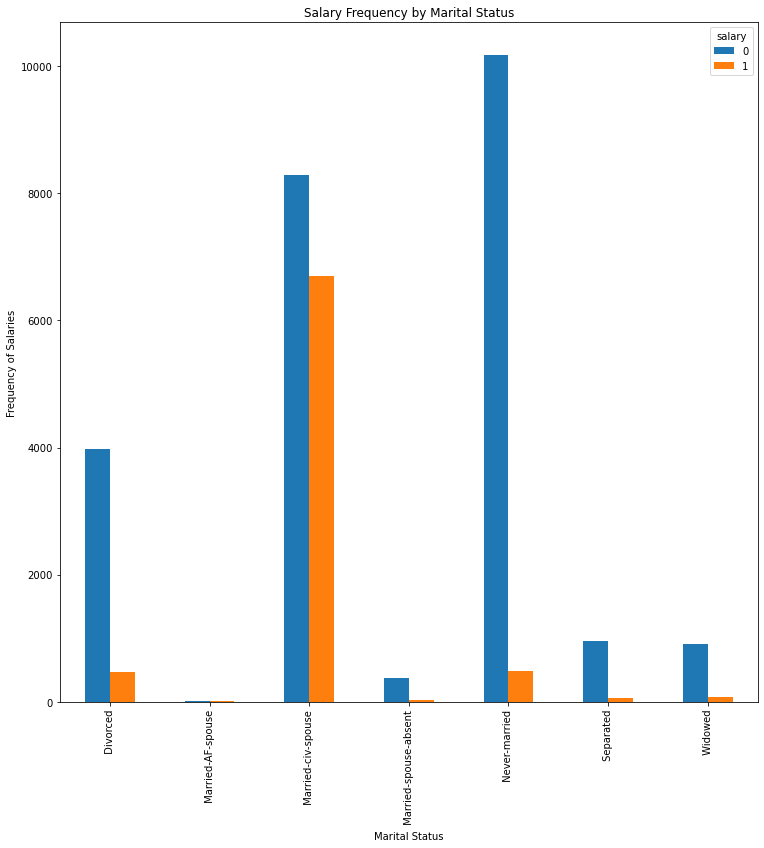

In [8]:
#dum = pd.get_dummies(train['marital-status'])
tr_ms = train[['marital-status','salary']]
#tr_ms = pd.concat([tr_ms,dum],axis=1).dropna()

Ytr_ms = tr_ms['salary']
#Xtr_ms = tr_ms.drop(['marital-status', 'salary'], axis=1)


#dum = pd.get_dummies(test['marital-status'])
te_ms = test[['marital-status','salary']]
#te_ms = pd.concat([te_ms,dum],axis=1).dropna()

Yte_ms = te_ms['salary']
#Xte_ms = te_ms.drop(['marital-status', 'salary'], axis=1)

#print(pd.concat([tr_ms.groupby('marital-status').mean(), tr_ms.groupby('marital-status').count()], axis=1))

pd.crosstab(train['marital-status'],train['salary']).plot(kind='bar', figsize=(12.5, 12.5))
plt.title('Salary Frequency by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency of Salaries')
plt.show()

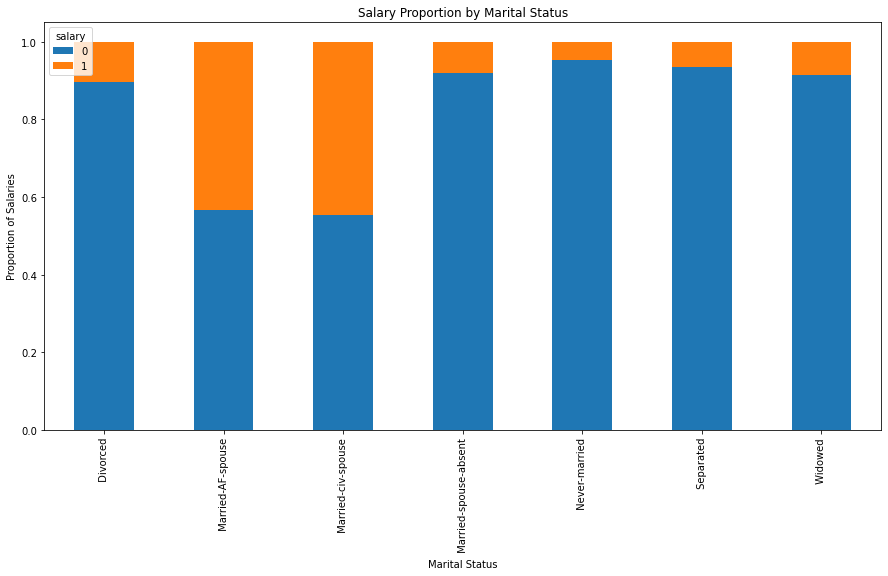

,mean,count
marital-status,,
Divorced,0.104256,4441
Married-AF-spouse,0.434783,23
Married-civ-spouse,0.446894,14970
Married-spouse-absent,0.081340,418
Never-married,0.046034,10666
Separated,0.064390,1025
Widowed,0.085599,993


In [9]:
table=pd.crosstab(train['marital-status'],train['salary'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(15, 7.5))
plt.title('Salary Proportion by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Salaries')
plt.show()

x = pd.concat([tr_ms.groupby('marital-status').mean(),tr_ms.groupby('marital-status').count()],axis=1)
x.columns = ['mean', 'count']
x

In [81]:
LR3 = LogisticRegression().fit(Xtr_ms, Ytr_ms)
y_pred4 = LR3.predict(Xte_ms)

GBC3 = GradientBoostingClassifier(random_state=0)
GBC3.fit(Xtr_ms, Ytr_ms)
y_pred5 = GBC3.predict(Xtr_ms)


print(confusion_matrix(Yte_ms, y_pred4))
#print(classification_report(Yte_ms, y_pred4))

print('\n\n',confusion_matrix(Ytr_ms, y_pred5))
#print(classification_report(Yte_ms, y_pred5))

print('\n\n',Yte_ms.value_counts())
print(pd.Series(y_pred5).value_counts())

[[12430     0]
 [ 3846     0]]


 [[24697     0]
 [ 7839     0]]


  <=50K    12430
 >50K      3846
Name: salary, dtype: int64
 <=50K    32536
dtype: int64


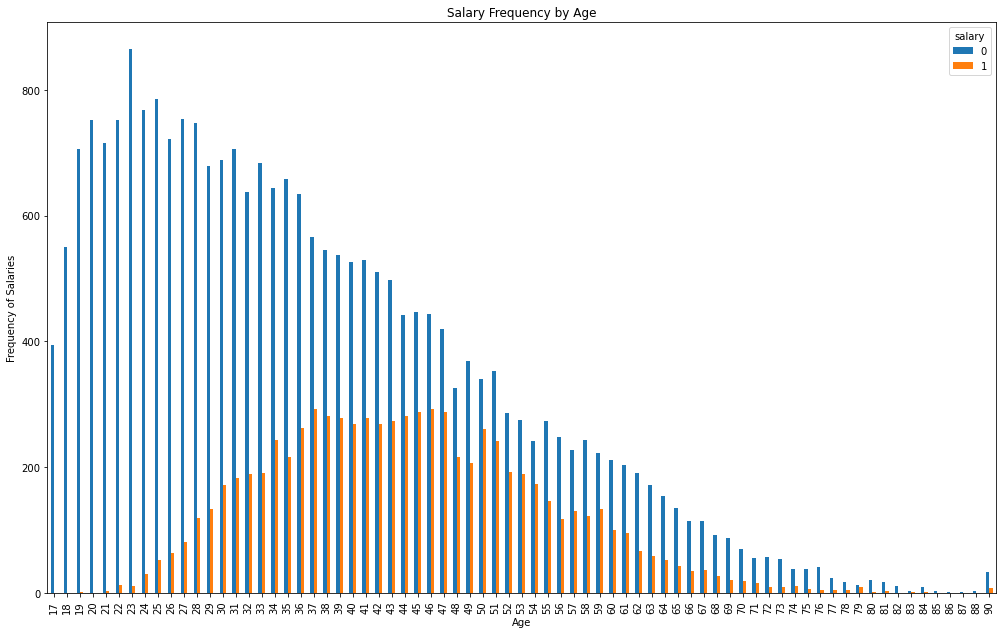

,mean
salary,
0,36.787586
1,44.250925


In [17]:
tr_ag = train[['age','salary']]
Ytr_ag = tr_ag['salary']

te_ag = test[['age','salary']]
Yte_ag = te_ag['salary']

pd.crosstab(train['age'],train['salary']).plot(kind='bar', figsize=(17, 10.5))
plt.title('Salary Frequency by Age')
plt.xlabel('Age')
plt.ylabel('Frequency of Salaries')
plt.show()

x = tr_ag.groupby('salary').mean()
x.columns = ['mean']
x

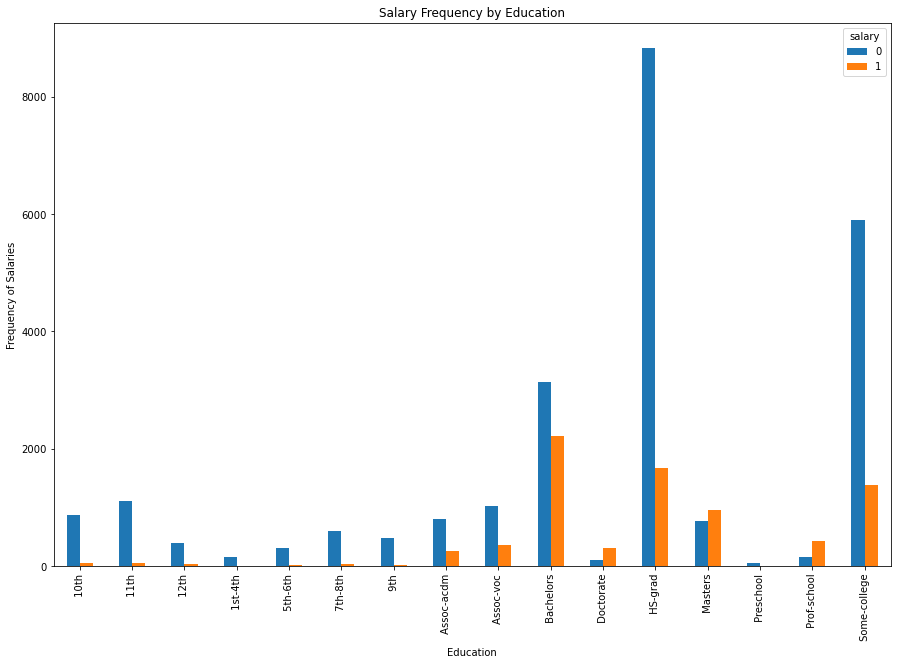

In [18]:
tr_ed = train[['education','salary']]
Ytr_ed = tr_ed['salary']

te_ed = test[['age','salary']]
Yte_ed = te_ed['salary']

pd.crosstab(train['education'],train['salary']).plot(kind='bar', figsize=(15, 10))
plt.title('Salary Frequency by Education')
plt.xlabel('Education')
plt.ylabel('Frequency of Salaries')
plt.show()

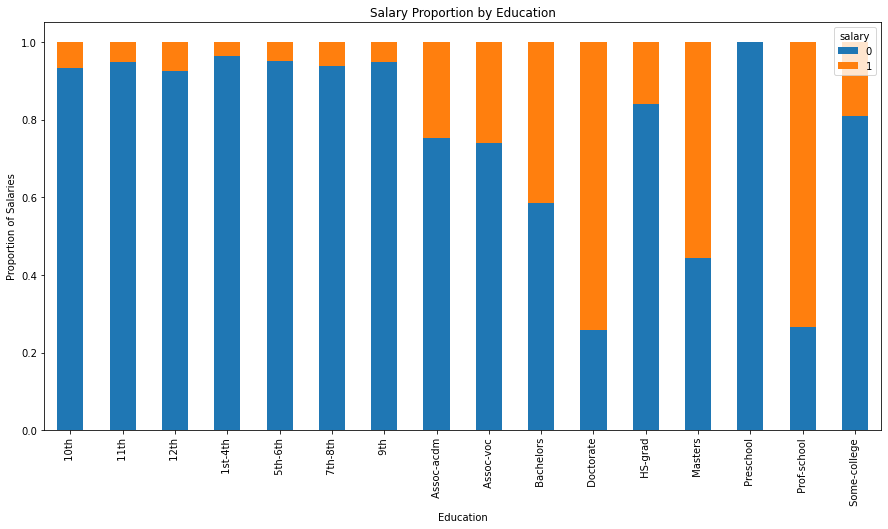

In [12]:
table=pd.crosstab(train['education'],train['salary'])
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(15, 7.5))
plt.title('Salary Proportion by Education')
plt.xlabel('Education')
plt.ylabel('Proportion of Salaries')
plt.show()

x = pd.concat([tr_ed.groupby('education').mean(),tr_ed.groupby('education').count()],axis=1)
x.columns = ['mean', 'count']

In [13]:
dict(zip(train['education'],train['education-num']))

{' Bachelors': 13,
 ' HS-grad': 9,
 ' 11th': 7,
 ' Masters': 14,
 ' 9th': 5,
 ' Some-college': 10,
 ' Assoc-acdm': 12,
 ' Assoc-voc': 11,
 ' 7th-8th': 4,
 ' Doctorate': 16,
 ' Prof-school': 15,
 ' 5th-6th': 3,
 ' 10th': 6,
 ' 1st-4th': 2,
 ' Preschool': 1,
 ' 12th': 8}

In [14]:
x

,mean,count
education,,
10th,0.066452,933
11th,0.051064,1175
12th,0.076212,433
1st-4th,0.036145,166
5th-6th,0.048193,332
7th-8th,0.062016,645
9th,0.052529,514
Assoc-acdm,0.248360,1067
Assoc-voc,0.261216,1382
